<a href="https://colab.research.google.com/github/singh-prishita/MusicSpeechDiscrimination/blob/main/NNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Import generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Conv1D

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
import librosa
import IPython.display as ipd

x, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/music-speech/music-full/mu00001.wav')
ipd.Audio(x, rate=sr)

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from pydub import AudioSegment

In [98]:
x, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/music-speech/speech-full/sp00002.wav')
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=40)


In [99]:
print(mfccs)
print(mfccs.shape)

[[-1.8701910e+02 -2.0073874e+02 -2.1023065e+02 ... -5.4572693e+02
  -5.4931702e+02 -5.5355322e+02]
 [ 1.9225026e+02  2.0684407e+02  2.0884166e+02 ...  9.2021646e+00
   6.6849709e+00  2.6770432e+00]
 [-2.7114849e+00 -1.9926979e+01 -4.7659172e+01 ...  3.0263271e+00
   3.7590165e+00  2.4743567e+00]
 ...
 [-1.1571224e+01 -1.2629434e+01 -9.1019878e+00 ... -2.7941864e+00
  -3.8754955e-02 -1.3102752e-01]
 [-6.9224524e+00 -7.2611241e+00 -8.5222282e+00 ...  6.5669245e-01
   2.4430337e+00  1.5668543e-01]
 [ 1.2591835e+00 -2.3530953e+00 -6.9377379e+00 ...  1.5421844e+00
   2.9663556e+00  4.2885780e-01]]
(40, 646)


In [209]:
def extracting_features(name_file):
    audios, sample_rates = librosa.load(name_file, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audios, sr=sample_rates, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [210]:
import os
features=[]
directory = "/content/drive/MyDrive/Colab Notebooks/music-speech/speech-full"    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
        inner_features = []
        y, sr = librosa.load(directory+'/'+filename)
        class_label="Human-Speech"
        zcrs = librosa.feature.zero_crossing_rate(y)
        mfccs = librosa.feature.mfcc(y, sr=sr,n_mfcc=40)
        data = extracting_features(directory + '/' + filename)
        features.append([data, class_label])
     else:
        print("here")
        continue
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])        
print("done")

here
done


In [211]:
featuresdf.head()

,feature,class_label
0,"[-273.61823, 101.61787, -2.399586, 46.101913, ...",Human-Speech
1,"[-228.65521, 106.11402, -15.667508, 50.898582,...",Human-Speech
2,"[-272.7577, 79.549225, -8.291422, 46.874435, 6...",Human-Speech
3,"[-272.6477, 83.50246, -1.5155042, 48.30416, 11...",Human-Speech
4,"[-295.90656, 86.00357, -14.50969, 40.37063, 15...",Human-Speech


In [212]:
import os
directory = "/content/drive/MyDrive/Colab Notebooks/music-speech/music-full"    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
        inner_features = []
        y, sr = librosa.load(directory+'/'+filename)
        class_label="Music"
        zcrs = librosa.feature.zero_crossing_rate(y)
        mfccs = librosa.feature.mfcc(y, sr=sr,n_mfcc=40)
        data = extracting_features(directory + '/' + filename)
        features.append([data, class_label])
     else:
        print("here")
        continue
print("done")
featuresdf = pd.DataFrame(features, columns=['feature','class_label']) 
featuresdf.head()

here
done


,feature,class_label
0,"[-273.61823, 101.61787, -2.399586, 46.101913, ...",Human-Speech
1,"[-228.65521, 106.11402, -15.667508, 50.898582,...",Human-Speech
2,"[-272.7577, 79.549225, -8.291422, 46.874435, 6...",Human-Speech
3,"[-272.6477, 83.50246, -1.5155042, 48.30416, 11...",Human-Speech
4,"[-295.90656, 86.00357, -14.50969, 40.37063, 15...",Human-Speech


In [213]:
len(featuresdf)

195

In [215]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())


labelEncoder = LabelEncoder()
y_data = to_categorical(labelEncoder.fit_transform(y))

In [216]:
 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state = 127)

In [296]:
num_labels = y_data.shape[1]
filter_size = 2

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = build_model_graph()

In [297]:


num_epochs = 10
num_batch_size = 32

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
5/5 [==============================] - 1s 48ms/step - loss: 19.0710 - accuracy: 0.5705 - val_loss: 8.6544 - val_accuracy: 0.2821
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 19.2267 - accuracy: 0.5513 - val_loss: 6.6946 - val_accuracy: 0.2821
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 23.9066 - accuracy: 0.5192 - val_loss: 4.8791 - val_accuracy: 0.2821
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 17.9020 - accuracy: 0.5385 - val_loss: 3.3525 - val_accuracy: 0.2821
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 12.7426 - accuracy: 0.5256 - val_loss: 2.1930 - val_accuracy: 0.3590
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 12.5993 - accuracy: 0.5577 - val_loss: 1.4542 - val_accuracy: 0.4359
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 9.6408 - accuracy: 0.5192 - val_loss: 0.9855 - val_accuracy: 0.5128
Epoch 8/10
5/5 [=========

In [298]:


model.summary()


score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print(accuracy)

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 8)                 328       
                                                                 
 activation_154 (Activation)  (None, 8)                0         
                                                                 
 dropout_118 (Dropout)       (None, 8)                 0         
                                                                 
 dense_158 (Dense)           (None, 16)                144       
                                                                 
 activation_155 (Activation)  (None, 16)               0         
                                                                 
 dropout_119 (Dropout)       (None, 16)                0         
                                                                 
 dense_159 (Dense)           (None, 32)              

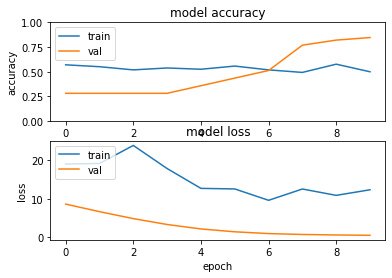

In [299]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss'); plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.set_xlim(0, 1)
plt.show()

Training Accuracy: 76.28%
5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        86
           1       0.79      0.64      0.71        70

    accuracy                           0.76       156
   macro avg       0.77      0.75      0.75       156
weighted avg       0.77      0.76      0.76       156

[[74 12]
 [25 45]]


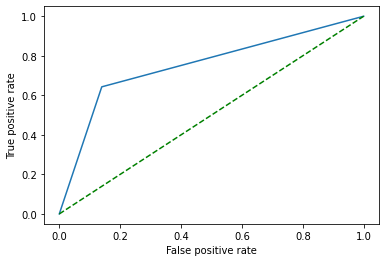

Testing Accuracy: 84.62%
2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.83      0.71      0.77        14

    accuracy                           0.85        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.85      0.85      0.84        39

[[23  2]
 [ 4 10]]


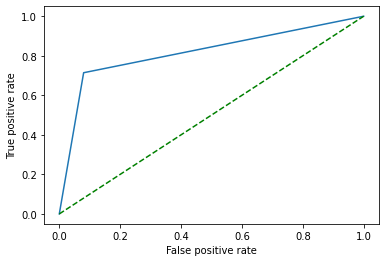

In [300]:

from sklearn.metrics import confusion_matrix, classification_report

score_train = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score_train[1]))
preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_train1,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot([0, 1], [0, 1], color='green',linestyle= '--')
plt.show()

score_test = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score_test[1]))
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test1,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle= '--')
plt.show()